In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
AirBnB = pd.read_csv('../data/Listings_cleaned.csv', dtype={'host_response_time':object, 'host_response_rate':np.float64})

In [3]:
AirBnB = AirBnB.drop(columns='Unnamed: 0')

In [4]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279368 entries, 0 to 279367
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279368 non-null  int64  
 1   name                         279196 non-null  object 
 2   host_id                      279368 non-null  int64  
 3   host_since                   279203 non-null  object 
 4   host_location                278530 non-null  object 
 5   host_response_time           150749 non-null  object 
 6   host_response_rate           150749 non-null  float64
 7   host_acceptance_rate         166443 non-null  float64
 8   host_is_superhost            279203 non-null  object 
 9   host_total_listings_count    279203 non-null  float64
 10  host_has_profile_pic         279203 non-null  object 
 11  host_identity_verified       279203 non-null  object 
 12  neighbourhood                279368 non-null  object 
 13 

In [5]:
AirBnB.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,tv,pool,hot water,hot tub,bed linens,gym,waterfront,beachfront,hdtv,parking
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,False,False,False,False,False,False,False,False,False,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,False,False,False,False,False,False,False,False,False,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,True,False,False,False,False,False,False,False,False,False


In [6]:
city_summary = pd.read_csv('../data/Cities_Summary.csv')

In [7]:
city_summary = city_summary.drop(columns='Unnamed: 0')

In [8]:
city_summary

,city,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating
0,Bangkok,19280,23621.0,370527,61468,92.996950
1,Cape Town,19022,35425.0,449106,73504,94.402771
2,Hong Kong,7085,7669.0,107241,19862,89.704792
3,Istanbul,24495,34068.0,480734,78616,91.069328
4,Mexico City,20037,28858.0,413813,61028,94.835728
5,New York,36984,43973.0,756268,103491,93.767188
6,Paris,64628,70222.0,1135617,196508,93.063931
7,Rio de Janeiro,26566,42368.0,475827,110533,94.576457
8,Rome,27641,39971.0,591228,103456,93.516489
9,Sydney,33630,52402.0,682659,109869,93.234135


In [9]:
city_summary['bedrooms_per_listing'] = city_summary.city_total_bedrooms / city_summary.listings_per_city
city_summary['amenities_per_listing'] = city_summary.city_total_amenities / city_summary.listings_per_city
city_summary['accommodates_per_listing'] = city_summary.city_total_accommodates / city_summary.listings_per_city

In [10]:
#make the city column the new index
city_summary_newind = city_summary.set_index('city')

In [11]:
city_summary_newind

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing
city,,,,,,,,
Bangkok,19280,23621.0,370527,61468,92.996950,1.225156,19.218205,3.188174
Cape Town,19022,35425.0,449106,73504,94.402771,1.862317,23.609820,3.864157
Hong Kong,7085,7669.0,107241,19862,89.704792,1.082428,15.136344,2.803387
Istanbul,24495,34068.0,480734,78616,91.069328,1.390814,19.625801,3.209471
Mexico City,20037,28858.0,413813,61028,94.835728,1.440236,20.652443,3.045765
New York,36984,43973.0,756268,103491,93.767188,1.188974,20.448518,2.798264
Paris,64628,70222.0,1135617,196508,93.063931,1.086557,17.571594,3.040602
Rio de Janeiro,26566,42368.0,475827,110533,94.576457,1.594820,17.911127,4.160694
Rome,27641,39971.0,591228,103456,93.516489,1.446076,21.389530,3.742846


In [12]:
city_summary_newind.bedrooms_per_listing.sort_values(ascending=False)

city
Cape Town         1.862317
Rio de Janeiro    1.594820
Sydney            1.558192
Rome              1.446076
Mexico City       1.440236
Istanbul          1.390814
Bangkok           1.225156
New York          1.188974
Paris             1.086557
Hong Kong         1.082428
Name: bedrooms_per_listing, dtype: float64

In [13]:
city_summary_newind.accommodates_per_listing.sort_values(ascending=False)

city
Rio de Janeiro    4.160694
Cape Town         3.864157
Rome              3.742846
Sydney            3.266994
Istanbul          3.209471
Bangkok           3.188174
Mexico City       3.045765
Paris             3.040602
Hong Kong         2.803387
New York          2.798264
Name: accommodates_per_listing, dtype: float64

In [14]:
city_summary_newind.amenities_per_listing.sort_values(ascending=False)

city
Cape Town         23.609820
Rome              21.389530
Mexico City       20.652443
New York          20.448518
Sydney            20.299108
Istanbul          19.625801
Bangkok           19.218205
Rio de Janeiro    17.911127
Paris             17.571594
Hong Kong         15.136344
Name: amenities_per_listing, dtype: float64

In [15]:
city_summary_newind.city_avg_review_scores_rating.sort_values(ascending=False)

city
Mexico City       94.835728
Rio de Janeiro    94.576457
Cape Town         94.402771
New York          93.767188
Rome              93.516489
Sydney            93.234135
Paris             93.063931
Bangkok           92.996950
Istanbul          91.069328
Hong Kong         89.704792
Name: city_avg_review_scores_rating, dtype: float64

In [16]:
#creating a dictionary to hold the population and area in square miles for each city
pop_and_area_dict = {0 : ['Bangkok', 10690000, 602], 1 : ['Cape Town', 4618000, 944], 2 : ['Hong Kong', 7413000, 430], 
                     3 : ['Istanbul', 15460000, 2063], 4 : ['Mexico City', 8855000, 573], 5 : ['New York', 8468000, 302.6], 
                     6 : ['Paris', 2161000, 40.7], 7 : ['Rio de Janeiro', 6748000, 463], 8 : ['Rome', 2873000, 496], 
                     9 : ['Sydney', 5312000, 4775]}

In [17]:
#turning the dictionary into a dataframe
pop_and_area_df = pd.DataFrame.from_dict(pop_and_area_dict, orient='index', columns=['city','population', 'area_sq_mi'])

In [18]:
pop_and_area_df

,city,population,area_sq_mi
0,Bangkok,10690000,602.0
1,Cape Town,4618000,944.0
2,Hong Kong,7413000,430.0
3,Istanbul,15460000,2063.0
4,Mexico City,8855000,573.0
5,New York,8468000,302.6
6,Paris,2161000,40.7
7,Rio de Janeiro,6748000,463.0
8,Rome,2873000,496.0
9,Sydney,5312000,4775.0


In [19]:
#number of listings per 100 people in the city. The 100 scaling is from eyeballing the magnitudes 
city_summary['listings_per_capita'] = city_summary.listings_per_city / pop_and_area_df.population

In [20]:
city_summary['listings_per_sq_mile'] = city_summary.listings_per_city / pop_and_area_df.area_sq_mi

In [22]:
city_summary

,city,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing,listings_per_capita,listings_per_sq_mile
0,Bangkok,19280,23621.0,370527,61468,92.996950,1.225156,19.218205,3.188174,0.001804,32.026578
1,Cape Town,19022,35425.0,449106,73504,94.402771,1.862317,23.609820,3.864157,0.004119,20.150424
2,Hong Kong,7085,7669.0,107241,19862,89.704792,1.082428,15.136344,2.803387,0.000956,16.476744
3,Istanbul,24495,34068.0,480734,78616,91.069328,1.390814,19.625801,3.209471,0.001584,11.873485
4,Mexico City,20037,28858.0,413813,61028,94.835728,1.440236,20.652443,3.045765,0.002263,34.968586
5,New York,36984,43973.0,756268,103491,93.767188,1.188974,20.448518,2.798264,0.004368,122.220753
6,Paris,64628,70222.0,1135617,196508,93.063931,1.086557,17.571594,3.040602,0.029907,1587.911548
7,Rio de Janeiro,26566,42368.0,475827,110533,94.576457,1.594820,17.911127,4.160694,0.003937,57.377970
8,Rome,27641,39971.0,591228,103456,93.516489,1.446076,21.389530,3.742846,0.009621,55.727823
9,Sydney,33630,52402.0,682659,109869,93.234135,1.558192,20.299108,3.266994,0.006331,7.042932


In [23]:
city_summary.set_index('city').listings_per_capita.sort_values(ascending=False)

city
Paris             0.029907
Rome              0.009621
Sydney            0.006331
New York          0.004368
Cape Town         0.004119
Rio de Janeiro    0.003937
Mexico City       0.002263
Bangkok           0.001804
Istanbul          0.001584
Hong Kong         0.000956
Name: listings_per_capita, dtype: float64

In [24]:
city_summary.set_index('city').listings_per_sq_mile.sort_values(ascending=False)

city
Paris             1587.911548
New York           122.220753
Rio de Janeiro      57.377970
Rome                55.727823
Mexico City         34.968586
Bangkok             32.026578
Cape Town           20.150424
Hong Kong           16.476744
Istanbul            11.873485
Sydney               7.042932
Name: listings_per_sq_mile, dtype: float64

<AxesSubplot:>

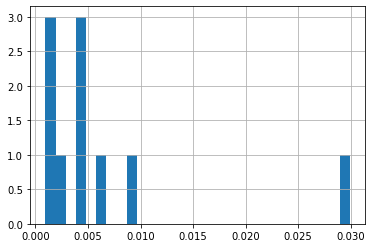

In [28]:
city_summary.listings_per_capita.hist(bins=30)

<AxesSubplot:>

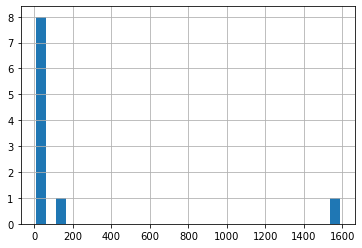

In [31]:
city_summary.listings_per_sq_mile.hist(bins=30)

In [32]:
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
city_summary_scale = city_summary.set_index('city')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
city_summary_index = city_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
city_summary_columns = city_summary_scale.columns
city_summary_scale

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing,listings_per_capita,listings_per_sq_mile
city,,,,,,,,,,
Bangkok,19280,23621.0,370527,61468,92.996950,1.225156,19.218205,3.188174,0.001804,32.026578
Cape Town,19022,35425.0,449106,73504,94.402771,1.862317,23.609820,3.864157,0.004119,20.150424
Hong Kong,7085,7669.0,107241,19862,89.704792,1.082428,15.136344,2.803387,0.000956,16.476744
Istanbul,24495,34068.0,480734,78616,91.069328,1.390814,19.625801,3.209471,0.001584,11.873485
Mexico City,20037,28858.0,413813,61028,94.835728,1.440236,20.652443,3.045765,0.002263,34.968586
New York,36984,43973.0,756268,103491,93.767188,1.188974,20.448518,2.798264,0.004368,122.220753
Paris,64628,70222.0,1135617,196508,93.063931,1.086557,17.571594,3.040602,0.029907,1587.911548
Rio de Janeiro,26566,42368.0,475827,110533,94.576457,1.594820,17.911127,4.160694,0.003937,57.377970
Rome,27641,39971.0,591228,103456,93.516489,1.446076,21.389530,3.742846,0.009621,55.727823


In [35]:
city_summary_scale = scale(city_summary_scale)

In [37]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
city_summary_scaled_df = pd.DataFrame(city_summary_scale, columns=city_summary_columns)
city_summary_scaled_df

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing,listings_per_capita,listings_per_sq_mile
0,-0.593720,-0.893905,-0.678104,-0.688274,-0.078693,-0.690478,-0.166892,-0.283724,-0.572685,-0.349164
1,-0.611415,-0.152746,-0.374962,-0.415462,0.844539,2.018527,1.824511,1.264723,-0.289655,-0.374674
2,-1.430106,-1.895512,-1.693806,-1.631328,-2.240722,-1.297311,-2.017834,-1.165139,-0.676312,-0.382565
3,-0.236053,-0.237951,-0.252948,-0.299592,-1.344603,0.013850,0.017935,-0.234940,-0.599471,-0.392453
4,-0.541802,-0.565080,-0.511115,-0.698247,1.128871,0.223972,0.483472,-0.609934,-0.516552,-0.342844
5,0.620496,0.383972,0.810005,0.264232,0.427139,-0.844313,0.391001,-1.176875,-0.259292,-0.155425
6,2.516439,2.032115,2.273455,2.372584,-0.034705,-1.279755,-0.913557,-0.621763,2.862354,2.992917
7,-0.094015,0.283196,-0.271878,0.423849,0.958603,0.881217,-0.759594,1.943988,-0.311929,-0.294708
8,-0.020287,0.132692,0.173315,0.263439,0.262499,0.248806,0.817708,0.986840,0.382840,-0.298253
9,0.390464,0.913219,0.526037,0.408798,0.077071,0.725485,0.323250,-0.103175,-0.019299,-0.402829


In [38]:
city_summary_scaled_df.mean()

listings_per_city                5.551115e-17
city_total_bedrooms              1.665335e-16
city_total_amenities             6.661338e-17
city_total_accommodates          1.110223e-17
city_avg_review_scores_rating   -8.421042e-15
bedrooms_per_listing            -4.551914e-16
amenities_per_listing            6.106227e-17
accommodates_per_listing        -5.440093e-16
listings_per_capita              4.336809e-17
listings_per_sq_mile            -1.110223e-17
dtype: float64

In [39]:
city_summary_scaled_df.std(ddof=0)

listings_per_city                1.0
city_total_bedrooms              1.0
city_total_amenities             1.0
city_total_accommodates          1.0
city_avg_review_scores_rating    1.0
bedrooms_per_listing             1.0
amenities_per_listing            1.0
accommodates_per_listing         1.0
listings_per_capita              1.0
listings_per_sq_mile             1.0
dtype: float64

In [40]:
city_pca = PCA().fit(city_summary_scale)

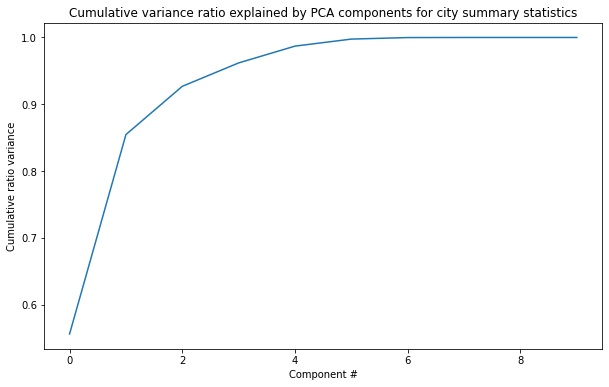

In [41]:
plt.subplots(figsize=(10, 6))
plt.plot(city_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for city summary statistics');

First 2 components seem to account for over 85% of the variance and the first 4 around 95%.

In [42]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
city_pca_x = city_pca.transform(city_summary_scale)

In [43]:
city_pca_x.shape

(10, 10)

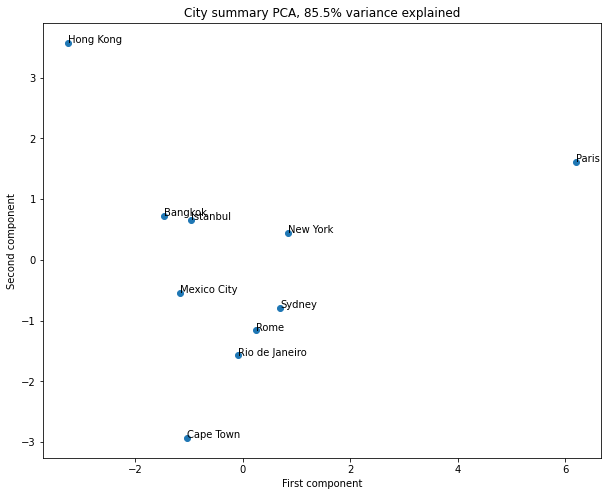

In [45]:
x = city_pca_x[:, 0]
y = city_pca_x[:, 1]
city = city_summary_index
pc_var = 100 * city_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'City summary PCA, {pc_var:.1f}% variance explained')
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))

In [46]:
city_avg_price = AirBnB.groupby('city')['price'].mean()
city_avg_price

city
Bangkok           1777.653942
Cape Town         2137.335559
Hong Kong          725.162315
Istanbul           447.117412
Mexico City       1035.168987
New York           142.950384
Paris              113.204942
Rio de Janeiro     593.338967
Rome               105.130458
Sydney             222.013440
Name: price, dtype: float64

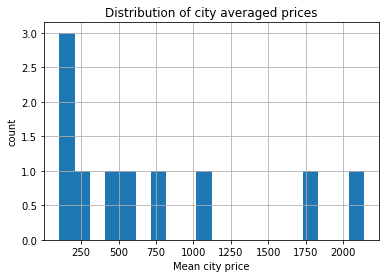

In [50]:
city_avg_price.hist(bins=20)
plt.title('Distribution of city averaged prices')
plt.xlabel('Mean city price')
plt.ylabel('count');

In [51]:
#Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': city_pca_x[:, 0], 'PC2': city_pca_x[:, 1]}, index=city_summary_index)
pca_df

,PC1,PC2
city,,
Bangkok,-1.465355,0.719019
Cape Town,-1.030817,-2.932305
Hong Kong,-3.246483,3.573233
Istanbul,-0.967120,0.661393
Mexico City,-1.165489,-0.538837
New York,0.844230,0.439664
Paris,6.188838,1.608910
Rio de Janeiro,-0.096671,-1.572950
Rome,0.246879,-1.162641


In [52]:
#cast our city_avg_price series to a dataframe also
city_avg_price.to_frame()

,price
city,
Bangkok,1777.653942
Cape Town,2137.335559
Hong Kong,725.162315
Istanbul,447.117412
Mexico City,1035.168987
New York,142.950384
Paris,113.204942
Rio de Janeiro,593.338967
Rome,105.130458


In [53]:
#concatenate `pca_df` and `city_avg_price`
pca_df = pd.concat([pca_df, city_avg_price], axis=1)
pca_df

,PC1,PC2,price
city,,,
Bangkok,-1.465355,0.719019,1777.653942
Cape Town,-1.030817,-2.932305,2137.335559
Hong Kong,-3.246483,3.573233,725.162315
Istanbul,-0.967120,0.661393,447.117412
Mexico City,-1.165489,-0.538837,1035.168987
New York,0.844230,0.439664,142.950384
Paris,6.188838,1.608910,113.204942
Rio de Janeiro,-0.096671,-1.572950,593.338967
Rome,0.246879,-1.162641,105.130458


In [54]:
pca_df['Quartile'] = pd.qcut(pca_df.price, q=4, precision=1)
pca_df

,PC1,PC2,price,Quartile
city,,,,
Bangkok,-1.465355,0.719019,1777.653942,"(957.7, 2137.3]"
Cape Town,-1.030817,-2.932305,2137.335559,"(957.7, 2137.3]"
Hong Kong,-3.246483,3.573233,725.162315,"(520.2, 957.7]"
Istanbul,-0.967120,0.661393,447.117412,"(162.7, 520.2]"
Mexico City,-1.165489,-0.538837,1035.168987,"(957.7, 2137.3]"
New York,0.844230,0.439664,142.950384,"(105.0, 162.7]"
Paris,6.188838,1.608910,113.204942,"(105.0, 162.7]"
Rio de Janeiro,-0.096671,-1.572950,593.338967,"(520.2, 957.7]"
Rome,0.246879,-1.162641,105.130458,"(105.0, 162.7]"


In [55]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,price,Quartile
city,,,,


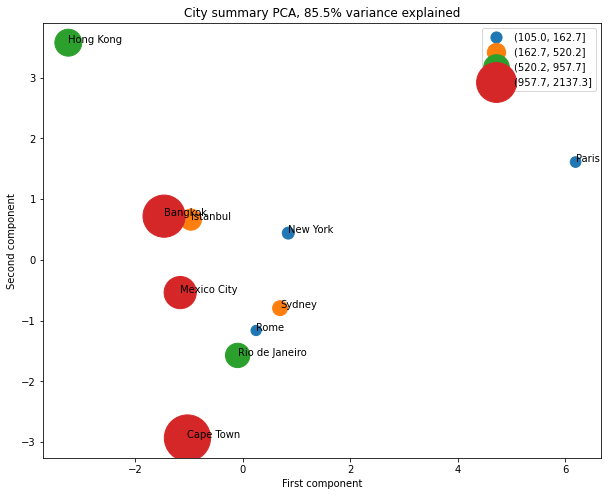

In [57]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.price
quartiles = pca_df.Quartile
city = pca_df.index
pc_var = 100 * city_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'City summary PCA, {pc_var:.1f}% variance explained')
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))

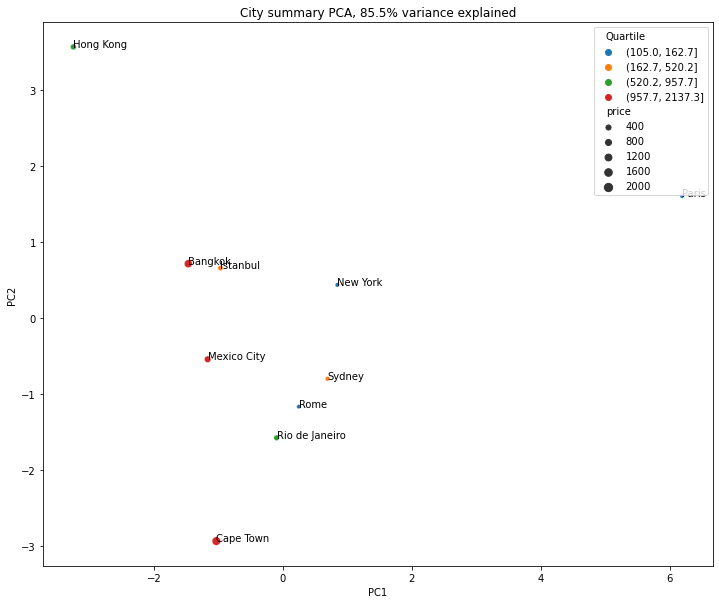

In [58]:
x = pca_df.PC1
y = pca_df.PC2
city = pca_df.index
plt.subplots(figsize=(12, 10))
sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2, size=pca_df.price, hue=pca_df.Quartile, 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
for c, x, y in zip(city, x, y):
    plt.annotate(c, (x, y))   
plt.title(f'City summary PCA, {pc_var:.1f}% variance explained');

In [59]:
pd.DataFrame(city_pca.components_, columns=city_summary_columns)

,listings_per_city,city_total_bedrooms,city_total_amenities,city_total_accommodates,city_avg_review_scores_rating,bedrooms_per_listing,amenities_per_listing,accommodates_per_listing,listings_per_capita,listings_per_sq_mile
0,0.420359,0.396493,0.411935,0.414518,0.120043,-0.095068,-0.008828,-0.018424,0.397834,0.377410
1,0.019231,-0.157736,-0.050607,-0.076792,-0.461601,-0.530797,-0.477018,-0.453690,0.082239,0.176993
2,-0.082796,-0.016303,-0.205121,0.124175,-0.222469,0.170159,-0.554906,0.704823,0.171267,0.151361
3,0.027103,0.157594,0.115510,0.019961,-0.837721,0.319731,0.383095,-0.006849,0.074092,-0.066232
4,-0.195909,-0.380831,-0.212942,-0.232040,0.071987,0.065638,0.350595,-0.016064,0.505505,0.573760
5,0.014881,-0.221867,0.116180,0.127138,-0.094784,-0.695497,0.378139,0.477630,0.063914,-0.230190
6,-0.248700,0.179945,-0.031785,-0.073763,0.083567,0.012345,-0.113444,-0.135875,0.718745,-0.586732
7,-0.036300,-0.371462,0.804941,-0.370555,0.008891,0.160733,-0.193561,0.098402,0.032160,-0.036877
8,0.033406,0.595369,-0.020514,-0.725977,0.003989,-0.226456,0.032565,0.198439,-0.041754,0.153217
9,0.844069,-0.271523,-0.253235,-0.258182,-0.000963,0.112872,-0.019800,0.033063,0.145431,-0.218314


In [63]:
city_summary[city_summary.city.isin(['Hong Kong', 'Paris'])].T

,2,6
city,Hong Kong,Paris
listings_per_city,7085,64628
city_total_bedrooms,7669.0,70222.0
city_total_amenities,107241,1135617
city_total_accommodates,19862,196508
city_avg_review_scores_rating,89.704792,93.063931
bedrooms_per_listing,1.082428,1.086557
amenities_per_listing,15.136344,17.571594
accommodates_per_listing,2.803387,3.040602
listings_per_capita,0.000956,0.029907
